# Practical 3A - Neural Network from Scratch 

### Importing the libraries

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Creating the Base Layer

In [76]:
# creating the base layer

class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward(self, input):
        pass

    def backward(self, output_gradient, learning_rate):
        pass

### Creating the Dense Layer

In [77]:
# creating the Dense layer

import numpy as np

class Layer_Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size,input_size)
        self.biases = np.random.randn(output_size,1)
        

    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input ) + self.biases

    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient,self.input.T )
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= learning_rate * weights_gradient
        self.biases -=learning_rate * output_gradient
        return input_gradient

### Creating the Activation Layer

In [78]:
# creating the activation layer

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward(self, input):
        self.input = input
        return self.activation(self.input)

    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

### Creating the Activation Function

In [79]:
# creating the activation functions

# Tanh function
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1 - np.tanh(x)**2
        
        super().__init__(tanh, tanh_prime)



### Creating the Loss Function

In [80]:
# creating the loss function

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# creating the loss function derivative

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

### Creating the Neural Network

In [84]:

# creating the neural network

X = np.reshape(([-1,-1],[-1,1],[1,-1],[1,1]),(4,2,1))
Y = np.reshape(([-1],[1],[1],[-1]),(4,1,1))

network = [
    Layer_Dense(2, 3),
    Tanh(),
    Layer_Dense(3, 1),
    Tanh()
]

epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)

        error += mse(y, output)
        # Backward pass
        output_gradient = mse_prime(y, output)
        for layer in reversed(network):
            output_gradient = layer.backward(output_gradient, learning_rate)

    if epoch % 1000 == 0:
        print("Epoch",epoch,"Error",error)
    
error/= len (X)
print ("------------------------------------------------------")
print("Final error: ",error)

Epoch 0 Error 9.015352113928474
Epoch 1000 Error 0.0017309007189660402
Epoch 2000 Error 0.0008325228221001937
Epoch 3000 Error 0.0005473951953643232
Epoch 4000 Error 0.0004075403604528212
Epoch 5000 Error 0.0003245180976783528
Epoch 6000 Error 0.0002695521715880739
Epoch 7000 Error 0.00023048357135038247
Epoch 8000 Error 0.0002012905487283029
Epoch 9000 Error 0.0001786508625900715
------------------------------------------------------
Final error:  4.0149503307265885e-05


### Testing the Neural Network

In [87]:
# testing the neural network

input_arr = np.reshape(([-1,-1],[-1,1],[1,-1],[1,1]),(4,2,1))
output_arr = np.array(([-1],[1],[1],[-1]))
predicted_arr = np.array([])

for x, y in zip(input_arr, output_arr):
    output = x
    for layer in network:
        output = layer.forward(output)
    predicted_arr = np.append(predicted_arr,output)


print ("Input\t Actual Output\t Predicted Output")
print ("_____________________________________________")
for i in range (len (input_arr)):
    print (input_arr[i],"\t    ",output_arr[i],"\t",predicted_arr[i])
    print ("----------------------------------------------------")

Input	 Actual Output	 Predicted Output
_____________________________________________
[[-1]
 [-1]] 	     [-1] 	 -0.9977145055744306
----------------------------------------------------
[[-1]
 [ 1]] 	     [1] 	 0.993188840912366
----------------------------------------------------
[[ 1]
 [-1]] 	     [1] 	 0.9930955702178632
----------------------------------------------------
[[1]
 [1]] 	     [-1] 	 -0.9921721271210165
----------------------------------------------------


### Plotting the Output

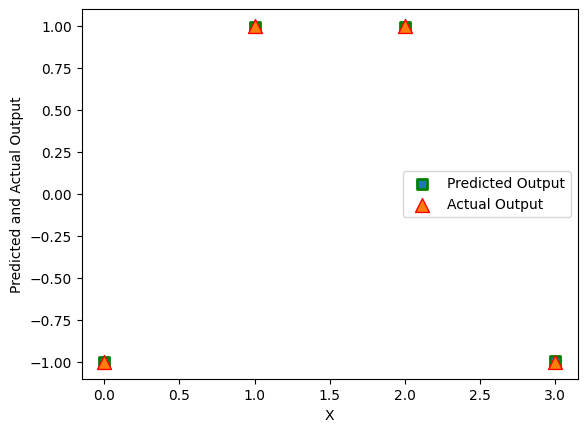

In [100]:
# Plotted the predicted output and actual output

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,4,1)
plt.scatter(x, predicted_arr, 
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
 
plt.scatter(x, output_arr, 
            linewidths = 1,
            marker ="^",
            edgecolor ="red",
            s = 100)
 
plt.xlabel("X")
plt.ylabel("Predicted and Actual Output")
plt.legend(["Predicted Output", "Actual Output"])
plt.show()


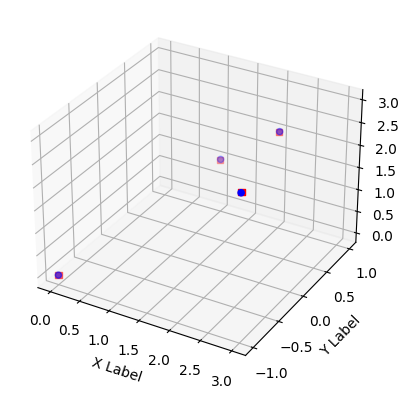

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


fig = plt.figure()
x = np.arange(0,4,1)
z = np.arange(0,4,1)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,predicted_arr,z, c='r', marker='s')
ax.scatter(x,output_arr,z, c='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()


